**Project Start Date** <br>
17th December 2020 <br>
Time to Run: <br>

**Data Sources** <br>
https://www.kaggle.com/usaf/world-war-ii/notebooks <br> 
https://www.kaggle.com/smid80/weatherww2/data <br>

**Background** <br>
Aerial Bombing Operations in WW2 - Bombing operations data <br>

This dataset consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

Weather Conditions in WW2 (Weather Stations / Weather Conditions) <br>
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

**Aim of this project** <br>
Use Sweetviz - A powerful package to speed up EDA, saving reports as HTML files and with the ability to compare test and train datasets 
Impletment the use of Ridge Plots as part of EDA to understand variabe distribution analysis 
One method of Outlier Detection & Analysis
Implement a regularised regression models that predicts the maximum weather temperature (based on the minimum temperature)
Test Assumptions of Regularised & Residual Analysis: Correlation of errors with predictor variables
Dockerise the notebook


**Analysis regarding Data Quality** <br>
Understanding of the sampling procedure 
- Since our project team did not participate in planning the study or data collection, it is possible that we are missing crucial context which could render our conclusions invalid. <br>

Potential biases <br> 
Real-world actions that generated the data you inherited <br>

**Objectives & Hypothesises to Test (max. 10)** <br>
<u>Exploratory Analysis</u>
- High level discriptive statistics [x]
- Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc. [x]
- Assessment of feature distributions & Scaling required [x]
    - Keep in mind that normalizing the inputs is generally a good idea in every type of regression
- Assessment of outliers and treatment
- Assessment of feature relationships [x]
    - What defines the feature 'poor weather' conditions? [x]
    - Is there a relationship between the daily minimum and maximum temperature (TimeSeries Analysis)? [x]
    - It is expected that average temperatures are colder in winter months than summer months [x]
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions) [x]
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere) [x]
    - It is expected that lower temperatures correlate with higher snowfall and precipation [x]
    - It is expected that higher levels above the sea have greater precipation [x]
    - It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection) [x]
    - Explore the meaning of 'PoorWeather' [x]
<br>

**Statistical Model/Machine Learning Applications** <br>
<br>
<u>Model Development Process</u>
- Create a Baseline (dummy) model (Predict the average maximum temperature) [x]
- Explain the train/test split [x]
- Application of Cross Validation [x]
- Predict the maximum temperature given the minimum temperature (Regularised Models) [x]
- Feature Selection/Importance (implicity given as the output of the model) [x]
- Explain appropriate error metric [x]
- Explain what features are developed and transformations applied [x]
- Explain if the model is exhibiting high bias or high variance and how this can be improved
    - Plot learning curves to deduce high bias/high variance and conclude what means could be applied to solve these issues
- Explain where the model seems to perform poorly - In what situations does the model make mistakes?

**Additional Learning notes from Reviewing 3 other Kaggle Notebooks** <br> 
- To much analysis before initial model development. Goal: Create up to 5 pieces of analysis then start model development

**Next steps** <br>
- Analysis of influencial data points
- Return p_value, std_err for the model results 
- Incorporate the aerial_bombing_data into the model
- Use latitude and longitude to impute "eval" rather than removing respective rows (similarity to impute values)
- Assess is using the fahrenheit variable as the target improves model performance 
- Geo-Spatial Data Features (Latitude & Longitude): Converting geolocation data into zones
- Drop the intercept: One important issue in case of both ridge and lasso regression is intercept handling. Generally, regularizing the intercept is not a good idea and it should be left out of regularization


**References** <br>
https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/ <br>
https://towardsdatascience.com/feature-engineering-combination-polynomial-features-3caa4c77a755

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Package Requirements
import os
import sys
# !{sys.executable} -m pip install markdown
# !{sys.executable} -m pip install sweetviz
# !{sys.executable} -m pip install joypy

In [3]:
# Data Wrangling
import pandas as pd
import numpy as np
import datetime 

# Data Exploration and Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
import joypy


Bad key text.latex.unicode in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotli

In [4]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/RegressionModels/notebooks'

In [5]:
aerial_bombing_data = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/ww2_boming_operations.csv')
weather_summary = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherTempPrediction.csv')
weather_station_location = pd.read_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/01_raw/WeatherStationLocations.csv')

data_list = []
data_list.append(aerial_bombing_data)
data_list.append(weather_summary)
data_list.append(weather_station_location)

In [6]:
# State the assumptions you’re being forced to make.
# Write up caveat notes to be included in the appendix of your final report
# Write cautionary notes that warn the decision-maker (and your other readers) that conclusions from the study will 
# need to be downgraded due to potential data issues

In [7]:
for i in data_list:
    print("Dataframe Dimensions")
    print(i.shape)
    print("")

    print("Dataframe Columns and respective types")
    print(i.dtypes)
    print("")

    print("Percentage of Missing Data")
    print(i.isnull().sum() * 100 / len(i))
    
    print("")

Dataframe Dimensions
(178281, 46)

Dataframe Columns and respective types
Mission ID                                 int64
Mission Date                              object
Theater of Operations                     object
Country                                   object
Air Force                                 object
Unit ID                                   object
Aircraft Series                           object
Callsign                                  object
Mission Type                              object
Takeoff Base                              object
Takeoff Location                          object
Takeoff Latitude                          object
Takeoff Longitude                        float64
Target ID                                 object
Target Country                            object
Target City                               object
Target Type                               object
Target Industry                           object
Target Priority                           ob

## Data Analysis

In [8]:
# Investiage options to link the dataframes with a unique key: weather_summary and weather_station_location look to be 
# connected via STA and WBAN respectively 
def uncommon_elements(list1, list2):
    ## Add something clever so the look up is always against the set with the largest number of unique records
    #list2 = max(len(list1), list(2))
    
    return [element for element in list2 if element not in list1]

STA = set(weather_summary.STA)
print(len(STA))

WBAN = set(weather_station_location.WBAN)
print(len(WBAN))

print('Sets are of the same data type: ', type(weather_summary.STA) == type(weather_station_location.WBAN))

print('Stations that are uncommon across both sets: ', uncommon_elements(STA, WBAN))

159
161
Sets are of the same data type:  True
Stations that are uncommon across both sets:  [15605, 15604]


In [9]:
combined_data = pd.merge(weather_summary, 
                         weather_station_location, 
                         how = 'inner', # takes care of only keeping records in both sets
                         left_on='STA',
                         right_on='WBAN')

print(len(combined_data))

119040


## Columns for Combined Data
**STA**
- STA: represent the Weather Station
- Not all STA codes represent the same time frequency 
- Object Data Type

**Date** 
- Date has been split into DA MO and YR respectively, note the century has been dropped when recording the YR
- Date Data Type (will require engineering in order to be used for ML

**Precip** 
- Precipitation in mm. This consists of numerical values and 'T' for 16,754 entries. This looks to be a mistake in the data collection (Impute precip == 0 for these cases)
- Numeric (float) Data Type

**MaxTemp and MinTemp** 
- These are features that have been transformed into celcius from fahrenheit readings MAX/MIN and these have been recorded to 6 decimal places. The degrees celcius value has additionally been converted to an average. Using celcius will have a smaller range than the fahrenheit records. Patterns may be more easily seen based fahrenheit columns 
- Numeric (float) Data Type

**MEA** 
- This is the mean for the fahrenheit MAX / MIN columns and this has been rounded to 1 d.p. Drop this columns and calculate the extact mean value
- Numeric (float) Data Type

**Snowfall**
- This looks to be measures in terms of the amount of snow that fell in mm. The units are not obvious so there are two options
- Either assume the units are centiments by attempting to research more about the data OR normalise all the columns so they are on the same scale
- Numeric (float) Data Type

**SNF**
- After research it is unclear what SNF relates too and seems to gave a range of 0 - 3.4 (Agree to remove)
- This supports the necessity to normalise the data for the numeric columns due to the possibility of differing units across columns
- Numeric (float) Data Type

**PRCP**
- This column looks to have been scaled by a factor of 1/25.4*Precip (Agree to remove)
- Numeric (float) Data Type

**TSHDSBRSGF**
- This is a repeat for PoorWeather so can be removed

**WBAN**
- Same as STA, representing the Weather Station
- Not all Weather Stations are located in the USA (unique STATE/COUNTRY ID = 63)
- This will be duplicated due to the merge so can be removed 
- Object Data Type

**NAME**
- This is the name of the weather station. It has a many:1 relationship with State/Country ID i.e. more than one station can be present per country 
- Object Data Type (Nominal)

**STATE/COUNTRY ID**
- This is the location of the weather station at state/country level
- Object Data Type (Nominal)

**LAT**
- This is the decimal latitude in string format 

**LON**
- This is the decimal latitude in string format 

**ELEV**
- Explanation not given - Expected to be level above the sea 
- Note that an elevation of 9999 means unknown
- Numeric (float) Data Type

**Latitude**
- This is the decimal latitude calculated from the LAT/LON provided (use this over string as in format for ML)

**Longitude**
- This is the decimal longitude calculated from the LAT/LON provided (use this over string as in format for ML)

### Data Cleaning - Remove duplicate Rows & Columns
- Remove all columns that exhibit over 90% missing values
- Remove celcius columns 'MaxTemp', 'MinTemp', 'MeanTemp' and 'MEA'
- Remove duplicated/scaled columns: 'PRCP', 'TSHDSBRSGF'
- Remove the primary key to join dataframes SNF & WBAN
- Remove LAT as string format
- Remove LON as string format
- Remove those columns with zero variance
- Remove duplicated rows

In [10]:
# Handling missing data - Remove any columns with over 90% missing data 
def remove_missing_values(data, thresold_limit = 0.9):
    
    return data.loc[:, data.isnull().sum() < thresold_limit*data.shape[0]]

combined_data = remove_missing_values(combined_data)

# Remove additional columns based on explanation above
combined_data.drop(['MaxTemp', 
                    'MinTemp', 
                    'MeanTemp', 
                    'MEA', 
                    'TSHDSBRSGF', 
                    'PRCP', 
                    #'PoorWeather', 
                    'SNF', 
                    'WBAN',
                    'LAT', 
                    'LON'], axis=1, inplace=True)

# Data Quality Expectations: Test for zero variance 
combined_data = combined_data.loc[:, combined_data.apply(pd.Series.nunique) != 1]

# Data Quality Expectations: Duplicated Records
print('Duplicated rows for index: ', combined_data[combined_data.duplicated()].index)
#print(len(combined_data))
combined_data = combined_data.drop_duplicates()
#print(len(combined_data))

Duplicated rows for index:  Int64Index([94660, 94661, 94662, 94663, 94664, 94665, 94666, 94667, 94668,
            94669],
           dtype='int64')


## Data Cleaning
- Understand and update data to correct type [x]
- Check that variables are within a range expected [x]
- Assessment of categorical labels and confirm they are as expected [x]
- Evaluate where missing data exists and how to deal with these fields [x]
    - Do any values look to be recorded to accommodate missing values? e.g. 999, 9999 etc. [x]
- Data represents logical coherence (e.g. underaged cannot hold a driving licence) [x]
- Reformatting: Drop/Rename columns [x]

### Correct Data Types

In [11]:
# Correct Date
def correct_dates(data, cols):
    
    return pd.to_datetime(combined_data[cols], format = '%Y-%m-%d')

# Correct Object Types
def correct_objects(data, cols):
    
    return data[cols].astype('object')

# Correct String Types
def correct_string(data, cols):
    
    return data[cols].astype(str)

combined_data.Date = correct_dates(combined_data, 'Date')

combined_data.STA = correct_objects(combined_data, 'STA')
combined_data.YR = correct_objects(combined_data, 'YR')
combined_data.MO = correct_objects(combined_data, 'MO')
combined_data.DA = correct_objects(combined_data, 'DA')

combined_data.Snowfall = correct_string(combined_data, 'Snowfall')
combined_data.PoorWeather = correct_string(combined_data, 'PoorWeather')

### Imputation of Missing Values

In [12]:
# Deal with Missing/Inaccurate values and correct data types 
def impute_precip_missing_values(data, cols):
    
    return np.where((data[cols] == 'T') | (data[cols] == ' '), 0, data[cols])

def impute_snowfall_missing_values(data, cols):
    
    return np.where((data[cols] == '#VALUE!') | (data[cols] == 'nan'), 0, data[cols])


# Correct float types
def correct_floats(data, cols):
    
    return data[cols].astype('float')

# As the target variable contains 4% missing values remove these to avoid inaccurate assumptions
def remove_missing_max(data):
    
    return data[data.loc[:, 'MAX'].notnull()]

def remove_missing_min(data):
    
    return data[data.loc[:, 'MIN'].notnull()]

combined_data.Precip = impute_precip_missing_values(combined_data, 'Precip')
combined_data.Precip = correct_floats(combined_data, 'Precip')

combined_data.Snowfall = impute_snowfall_missing_values(combined_data, 'Snowfall')
combined_data.Snowfall = correct_floats(combined_data, 'Snowfall')

combined_data = remove_missing_max(combined_data)
combined_data = remove_missing_min(combined_data)

In [13]:
# Verify that the above logic has been correctly applied 
print(combined_data[combined_data.loc[:, 'MAX'].isnull()])
print(combined_data[combined_data.loc[:, 'MIN'].isnull()])
print((combined_data.isnull().sum() * 100) / len(combined_data))

Empty DataFrame
Columns: [STA, Date, Precip, Snowfall, PoorWeather, YR, MO, DA, MAX, MIN, NAME, STATE/COUNTRY ID, ELEV, Latitude, Longitude]
Index: []
Empty DataFrame
Columns: [STA, Date, Precip, Snowfall, PoorWeather, YR, MO, DA, MAX, MIN, NAME, STATE/COUNTRY ID, ELEV, Latitude, Longitude]
Index: []
STA                 0.0
Date                0.0
Precip              0.0
Snowfall            0.0
PoorWeather         0.0
YR                  0.0
MO                  0.0
DA                  0.0
MAX                 0.0
MIN                 0.0
NAME                0.0
STATE/COUNTRY ID    0.0
ELEV                0.0
Latitude            0.0
Longitude           0.0
dtype: float64


In [14]:
#Check that variables are within a range expected
analysis_columns = combined_data.columns

for i in analysis_columns:
    print(i)
    print(min(combined_data[i]))
    print(max(combined_data[i]))
    print("""""")

    
## Precip - Contains letters and numeric values: Requires attention & cannot be negative 
## Snowfall - Contains #VALUE! and nan: Requires attention & cannot be negative
## PoorWeather - Contains nan: Requires attention 
## ELEV - Contains 9999 which suggests a comprimise for missing data

## STA - No reason to suggest dubious data
## Date - No reason to suggest dubious data
## YR - No reason to suggest dubious data & cannot be negative
## MO - No reason to suggest dubious data & cannot be negative
## DA - No reason to suggest dubious data & cannot be negative
## MAX - No reason to suggest dubious data
## MIN - No reason to suggest dubious data
## NAME - No reason to suggest dubious data & Categorical Data OK
## STATE/COUNTRY ID - No reason to suggest dubious data & Categorical Data OK
## Latitude - No reason to suggest dubious data
## Longitude - No reason to suggest dubious data

STA
10001
82506

Date
1940-01-01 00:00:00
1945-12-31 00:00:00

Precip
0.0
307.34

Snowfall
0.0
86.36

PoorWeather
0
nan

YR
40
45

MO
1
12

DA
1
31

MAX
-28.0
122.0

MIN
-37.0
94.0

NAME
ABADAN
WILLEMSTAD

STATE/COUNTRY ID
AL
UK

ELEV
1
9999

Latitude
-27.6
67.01666667

Longitude
-175.0
177.3666667



#### Specific Assessment for ELEV

In [15]:
print(round(len(combined_data[combined_data.ELEV == 9999])/len(combined_data)*100,2),'%')

2.96 %


In [16]:
combined_data[combined_data.ELEV == 9999].value_counts("STATE/COUNTRY ID")

STATE/COUNTRY ID
LI    2868
DR     629
TS      13
dtype: int64

In [17]:
combined_data[combined_data.ELEV == 9999].value_counts("NAME")

NAME
MARSHALL/ROBERTS FIELD    1270
CAPE PALMAS                935
FISHERMANS LAKE            663
CIUDAD TRUJILLO            629
EL DJEM                     13
dtype: int64

In [18]:
missing_col_eval = ['MARSHALL/ROBERTS FIELD', 'CAPE PALMAS', 'FISHERMANS LAKE', 'CIUDAD TRUJILLO', 'EL DJEM']

for i in missing_col_eval:
    print(i)
    print(combined_data[combined_data.NAME == i]["ELEV"].unique())
    print("""""")

MARSHALL/ROBERTS FIELD
[9999]

CAPE PALMAS
[9999]

FISHERMANS LAKE
[9999]

CIUDAD TRUJILLO
[9999]

EL DJEM
[9999]



In [19]:
missing_elev = combined_data[combined_data["ELEV"] == 9999]
pd.crosstab(missing_elev.NAME, missing_elev["STATE/COUNTRY ID"])

STATE/COUNTRY ID,DR,LI,TS
NAME,,,
CAPE PALMAS,0,935,0
CIUDAD TRUJILLO,629,0,0
EL DJEM,0,0,13
FISHERMANS LAKE,0,663,0
MARSHALL/ROBERTS FIELD,0,1270,0


In [20]:
# There is no way to impute values for ELEV based on other information available based on STATE or other location factors
## Decision to remove these rows
combined_data = combined_data[combined_data.ELEV != 9999]

### Linear Combination Check

In [21]:
combined_data.corr()

,Precip,Snowfall,MAX,MIN,ELEV,Latitude,Longitude
Precip,1.000000,-0.010155,0.005561,0.089336,-0.035566,-0.100628,0.009412
Snowfall,-0.010155,1.000000,-0.340857,-0.319970,-0.020968,0.208550,-0.031096
MAX,0.005561,-0.340857,1.000000,0.875380,-0.057549,-0.554199,0.044737
MIN,0.089336,-0.319970,0.875380,1.000000,-0.192664,-0.598662,-0.090369
ELEV,-0.035566,-0.020968,-0.057549,-0.192664,1.000000,0.076612,0.058855
Latitude,-0.100628,0.208550,-0.554199,-0.598662,0.076612,1.000000,-0.130017
Longitude,0.009412,-0.031096,0.044737,-0.090369,0.058855,-0.130017,1.000000


<AxesSubplot:>

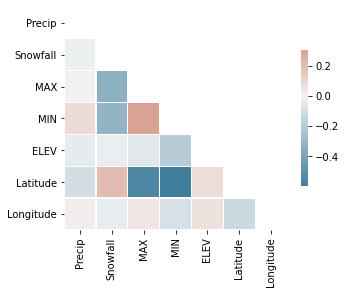

In [22]:
# Compute the correlation matrix
corr = combined_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
my_report = sv.analyze(combined_data)
my_report.show_html()

### Handling nominal and ordinal categorical values
Types: 
- Ordinal: Convert into numeric values retaining the datas natural order [x]
- Nominal: One Hot encoding/Label Encoding [x]
- Dichotomous (Binary): Convert values into indicator values 1/0 [x] <br>
The only columns that require revision at this stage are 'NAME' and 'STATE/COUNTRY ID' [x]

In [23]:
combined_data.select_dtypes('object').columns

Index(['STA', 'PoorWeather', 'YR', 'MO', 'DA', 'NAME', 'STATE/COUNTRY ID'], dtype='object')

In [24]:
def correct_category_datatype(data, cols):
    
    return data[cols].astype('category')

def correct_object_datatype(data, cols):
    
    return data[cols].astype('int')

combined_data.NAME = correct_category_datatype(combined_data, 'NAME')
combined_data['STATE/COUNTRY ID'] = correct_category_datatype(combined_data, 'STATE/COUNTRY ID')

combined_data['YR'] = correct_object_datatype(combined_data, 'YR')
combined_data['MO'] = correct_object_datatype(combined_data, 'MO')
combined_data['DA'] = correct_object_datatype(combined_data, 'DA')

In [51]:
# Pandas `.get_dummies()` method
NAME_dummies_df = pd.get_dummies(combined_data['NAME'])
STATE_dummies_df = pd.get_dummies(combined_data['STATE/COUNTRY ID'])

In [73]:
model_data = pd.concat([combined_data, pd.get_dummies(combined_data['STATE/COUNTRY ID'], prefix='category')],axis=1)

### Outlier Detection
- Univariate Outlier Detection
- It is expected that the accuracy of recordings based on stations may not be uniform (outlier detection)

In [26]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115022 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STA               115022 non-null  object        
 1   Date              115022 non-null  datetime64[ns]
 2   Precip            115022 non-null  float64       
 3   Snowfall          115022 non-null  float64       
 4   PoorWeather       115022 non-null  object        
 5   YR                115022 non-null  int64         
 6   MO                115022 non-null  int64         
 7   DA                115022 non-null  int64         
 8   MAX               115022 non-null  float64       
 9   MIN               115022 non-null  float64       
 10  NAME              115022 non-null  category      
 11  STATE/COUNTRY ID  115022 non-null  category      
 12  ELEV              115022 non-null  int64         
 13  Latitude          115022 non-null  float64       
 14  Long

In [27]:
outlier_data = combined_data[["Precip", "Snowfall", "MAX", "MIN", "ELEV"]]

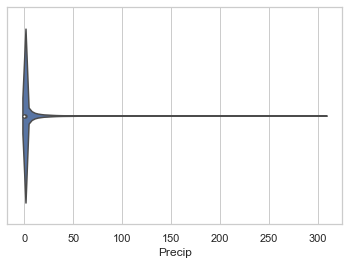

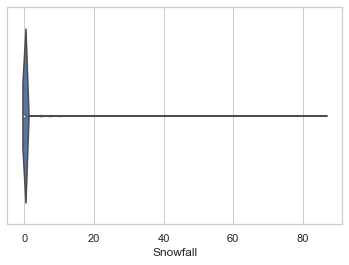

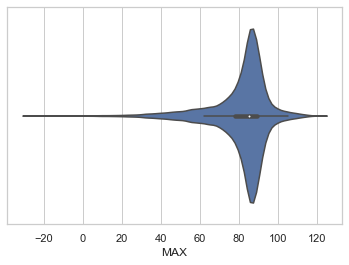

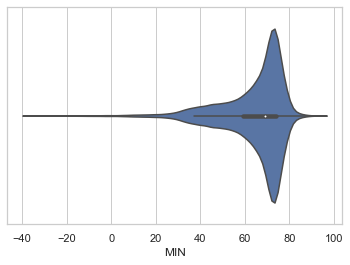

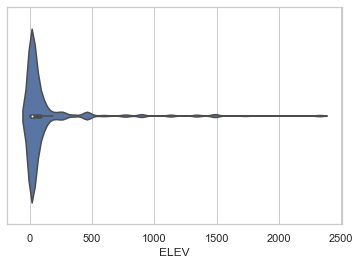

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")

for i, col in enumerate(outlier_data.columns):
    plt.figure(i)
    sns.violinplot(x=col, data=outlier_data)

### Exploratory Data Analysis 
**Hypothesis & Expectations to Test**
- Is this a Global study? What are the locations associated with the experiment? [x]
- High level discriptive statistics [x]
- Assessment of feature distributions [x]
- Assessment of feature relationships [x]
    - What is the relationship of each variable with the target? [x]
<br>

**References** <br>
https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34 <br>
https://medium.com/analytics-vidhya/how-to-plot-data-on-a-world-map-in-python-25cf9733c3dd <br>
https://towardsdatascience.com/pandas-profiling-sweetviz-8849704cadd7 <br>
https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052 <br>
https://towardsdatascience.com/all-you-want-to-know-about-preprocessing-data-preparation-b6c2866071d4 <br>

**Is this a Global study? What are the locations associated with the experiment?**

In [29]:
# Categorical data doesn’t have duplicates because of whitespaces, lower/upper cases

In [30]:
combined_data['STATE/COUNTRY ID'].unique()

['GH', 'GY', 'BZ', 'PM', 'CS', ..., 'NG', 'SO', 'AU', 'NH', 'FJ']
Length: 61
Categories (61, object): ['GH', 'GY', 'BZ', 'PM', ..., 'SO', 'AU', 'NH', 'FJ']

In [31]:
combined_data.NAME.unique()

['ACCRA', 'GEORGETOWN', 'CLEVELANDIA', 'BALBOA/ALBROOK', 'REY ISLAND', ..., 'MACKAY', 'ARCHER', 'AMBERLY', 'ROCKHAMPTON', 'BRISBANE']
Length: 152
Categories (152, object): ['ACCRA', 'GEORGETOWN', 'CLEVELANDIA', 'BALBOA/ALBROOK', ..., 'ARCHER', 'AMBERLY', 'ROCKHAMPTON', 'BRISBANE']

In [32]:
pd.crosstab(combined_data['STATE/COUNTRY ID'], combined_data.NAME)

NAME,ABADAN,ACCRA,ADANA,AGRA,AIN EL,AMBERLY,AMENDOLA,AMENDOLA/MU 9,AMIRABAD POST,AMURI/FIELD AAF,...,TELERGMA,TINDOUF,TONGATABU ISLAND,TOUAHAR,VAL DE CANS,WALLER/BWI,WARRINGTON,WHEELER/AFB 810.1,WHEELUS,WILLEMSTAD
STATE/COUNTRY ID,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,383,0,0,0,0,0,...,502,818,0,0,0,0,0,0,0,0
AT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AU,0,0,0,0,0,847,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TO,0,0,0,0,0,0,0,0,0,0,...,0,0,179,0,0,0,0,0,0,0
TS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**High Level Descriptive Statistics**

In [33]:
combined_data.describe()

,Precip,Snowfall,YR,MO,DA,MAX,MIN,ELEV,Latitude,Longitude
count,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000,115022.000000
mean,3.060413,0.250418,43.804177,6.717732,15.790501,80.863635,64.033472,123.000209,17.852116,-15.457468
std,10.317481,2.654196,1.139535,3.427010,8.795511,15.056446,14.627285,298.038868,19.997547,90.051251
min,0.000000,0.000000,40.000000,1.000000,1.000000,-28.000000,-37.000000,1.000000,-27.600000,-175.000000
25%,0.000000,0.000000,43.000000,4.000000,8.000000,78.000000,59.000000,9.000000,7.733333,-79.500000
50%,0.000000,0.000000,44.000000,7.000000,16.000000,85.000000,69.000000,23.000000,17.900000,-27.033333
75%,0.762000,0.000000,45.000000,10.000000,23.000000,89.000000,74.000000,86.000000,30.133333,48.250000
max,307.340000,86.360000,45.000000,12.000000,31.000000,122.000000,94.000000,2326.000000,67.016667,177.366667


In [34]:
combined_data.describe(include=['O'])

,STA,PoorWeather
count,115022,115022
unique,154,40
top,22508,nan
freq,2192,82062


**Assessment of feature distributions**

In [ ]:
# Density Plots for Numerical Columns
numeric_columns = combined_data.select_dtypes(include=['float64']).columns

for i, col in enumerate(combined_data.select_dtypes(include=['float64']).columns):
    plt.figure(i)
    sns.distplot(combined_data[col], hist=True, kde=True, color = 'darkblue')

In [ ]:
# Barplots for Categorical Data
object_columns = combined_data.select_dtypes(include=['object']).columns

for i, col in enumerate(combined_data.select_dtypes(include=['object']).columns):
    plt.figure(i)
    combined_data[col].value_counts().plot(kind='bar')

In [ ]:
pd.crosstab(combined_data.YR, combined_data.MO)

In [ ]:
from joypy import joyplot
feature_data = combined_data[['Date', 'NAME', 'MIN', 'MAX']]

In [ ]:
feature_data.NAME.value_counts()

In [ ]:
ridge_data = feature_data.query("NAME == 'WHEELER/AFB 810.1'")
ridge_data = ridge_data.drop('NAME', axis=1)
ridge_data['Date'] = ridge_data['Date'].astype('datetime64')
ridge_data['Month'] = ridge_data['Date'].dt.month_name()

ridge_data = ridge_data.reset_index()

In [ ]:
from pandas.api.types import CategoricalDtype

cat_month = CategoricalDtype(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

ridge_data['Month'] = ridge_data['Month'].astype(cat_month)

ridge_data.dtypes

In [ ]:
plt.figure()

joyplot(
    data=ridge_data[['MAX', 'Month']], 
    by='Month',
    figsize=(5, 5)
)

plt.title('Ridgeline Plot of Max Temperatures in WHEELER/AFB 810.1', fontsize=20)
plt.show()

In [ ]:
plt.figure()

ax, fig = joyplot(
    data=ridge_data[['MIN', 'MAX', 'Month']], 
    by='Month',
    column=['MIN', 'MAX'],
    color=['#686de0', '#eb4d4b'],
    legend=True,
    alpha=0.85,
    figsize=(5, 5)
)
plt.title('Ridgeline Plot of Min and Max Temperatures in WHEELER/AFB 810.1', fontsize=20)
plt.show()

In [ ]:
sns.pairplot(combined_data)

### Specific Research Questions
- Data Integrity Preprocessing Steps
    - What defines the feature 'poor weather' conditions? It looks as if this variable as been corrupted
    - Is there a relationship between the daily minimum and maximum temperature (TimeSeries Analysis)? Yes
    - It is expected that average temperatures are colder in winter months than summer months. Confirmed
    - It is expected that more snowfall occurs in the winter months (for northern hemisphere regions). Confirmed
    - It is expected that more Precipitation occurs in the winter months (for northern hemisphere). The results show on average more Precipitation occurs in the summer. Thisis negligible and extra analysis should split this further per region or by splitting Northern and Southern Hemisphere
    - It is expected that higher levels above the sea have greater precipation. The data shows that as ELEV increased the Precip decreases.
    - Have the years tended to get warmer on average?

In [ ]:
combined_data.columns

In [ ]:
poor_weather_data = combined_data[['PoorWeather', 'Precip', 'Snowfall', 'MIN', 'MAX', 'ELEV']]
poor_weather_data.PoorWeather.value_counts()

In [ ]:
import plotly.graph_objs as go

time_series = combined_data[['Date', 'MIN', 'MAX',]]
time_series = time_series.sort_values(by='Date')
time_series = time_series.sample(n=100, random_state=1)

columns = ['MIN', 'MAX']
names = {'MIN': 'Minimum Temperature',
         'MAX': 'Maximum Temperature'}

fig = go.Figure([{
    'x': time_series['Date'],
    'y': time_series[col],
    'name': names[col]
}  for col in columns])

fig.show(renderer='iframe')

In [ ]:
def winter_month_comparison(data, col):    
    
    return print(data[(data.MO == 1) | (data.MO == 11) | (data.MO == 12)][col].describe())

def summer_month_comparison(data, col):    
    
    return print(data[(data.MO == 6) | (data.MO == 7) | (data.MO == 8)][col].describe())

In [ ]:
winter_month_comparison(combined_data, "MIN")
print("""""")
winter_month_comparison(combined_data, "MAX")

In [ ]:
# Summer Months 
summer_month_comparison(combined_data, "MIN")
print("""""")
summer_month_comparison(combined_data, "MAX")

In [ ]:
# Winter Months
winter_month_comparison(combined_data, "Snowfall")
print("""""")
# Summer Months
summer_month_comparison(combined_data, "Snowfall")

In [ ]:
# Winter Months
winter_month_comparison(combined_data, "Precip")
print("""""")
# Summer Months
summer_month_comparison(combined_data, "Precip")

In [ ]:
sns.relplot(x="ELEV", y="Precip", data=combined_data);

In [ ]:
# Have the years tended to get warmer on average?


In [ ]:
# Write clean data to 02_intermediate data folder
#combined_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/02_intermediate/data_cleaning.csv')

### Feature Scaling & Normalisation

- The point of normalization is to change your observations so that they can be described as a normal distribution.
- In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

In [ ]:
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
#columns = ['Precip', 'Snowfall', 'MAX', 'MIN', 'ksp_date']

columns = ['Precip', 'Snowfall']

for i in columns:
    print(i)
    col_name = str(i) + '_normalised'
    print(col_name)
    model_data.loc[:, col_name] = preprocessing.normalize(model_data[[i]])    
    

for i in columns:
    print(i)
    col_name = str(i) + '_min_max_scale'
    print(col_name)
    scaler = MinMaxScaler()
    scaler.fit(model_data[[i]])
    model_data.loc[:, col_name] = scaler.transform(model_data[[i]])
    
    
# for i in columns:
#     print(i)
#     col_name = str(i) + '_boxcox'
#     print(col_name)
#     combined_data.loc[:, col_name] = stats.boxcox(combined_data[i]**2 + 1)

### Data Cleaning - Feature Engineering
- Deal with date columns. There are 4 most common methods to transform date to numeric format:
    - Unix timestamp: Time since 1970 (not applicable as our data is from period 1940 - 1944
    - KSP date formate: Year and quarter are obvious and attempts to retain similar intervals
    - Divide into several features (DA / MO / YR): Data already formated to accommodate these features
    - Manual Feature Creation: Time from or to an event
- Feature Creation:
    - Northern/Southern Hemisphere Flag
    - Binary Flag for univariate outliers
    - Create sensible bins for numerical Variables
    - Sine & Cos features (out of scope)
    - Average temperature per month/per quarter
- Normalization and standardization of features: Precip/Snowfall/SNF/ELEV <br>

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159 <br>
https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca <br>
https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c <br>
https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

**Date Time Features** <br>
Note: From there analysis it is clear that some areas from both the northern and southern hemisphere have been included as part of the research so care should be taken when dealing with datetime features

In [74]:
import datetime as dt
import calendar

def to_ksp_format(datetime):
    year = datetime.year
    day_from_jan_1 = (datetime - dt.datetime(year, 1, 1)).days
    is_leap_year = int(calendar.isleap(year))
    
    return year + (day_from_jan_1 - 0.5) / (365 + is_leap_year)

model_data['ksp_date'] = model_data['Date'].apply(to_ksp_format)

In [75]:
# Calculate the average based on the fahrenheit columns
model_data['MeanTemp_F'] = (model_data['MAX'] + combined_data['MIN'])/2

# Create a simplier binary feature for snowfall occurrence
model_data['Snowfall_bin'] =  np.where(model_data.Snowfall.isnull(), 0, 1)

# Add sine and cos features for seasonal elements 

# Create bins for ELEV Variable

**Bivariate Combinations**

In [102]:
from itertools import combinations
from sklearn.linear_model import LinearRegression

model_data = model_data.dropna()

y_train = model_data[['MAX']]
X_train_int = model_data[['Precip', 'Snowfall', 'YR', 'MO', 'DA', 'MIN', 'ELEV', 'ksp_date']]

columns_list = X_train_int.columns
interactions = list(combinations(columns_list, 2))

interaction_dict = {}
for interaction in interactions:
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    interaction_model = LinearRegression()
    interaction_model.fit(X_train_int, y_train)
    interaction_dict[interaction_model.score(X_train_int, y_train)] = interaction

top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('MIN', 'ELEV')
('Precip', 'MIN')
('Precip', 'ELEV')
('YR', 'ksp_date')
('MIN', 'ksp_date')


**Polynominal Features**

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}
poly_X_train_int = model_data[['Precip', 'Snowfall', 'YR', 'MO', 'DA', 'MIN', 'ELEV', 'ksp_date']]
for feature in poly_X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = poly_X_train_int
        X_train_poly['sq'] = X_train_poly[feature]**p
        lr = LinearRegression()
        lr.fit(X_train_poly, y_train)
        poly_dict[lr.score(X_train_poly, y_train)] = [feature, p]

poly_dict[max(poly_dict.keys())]

['MIN', 4]

### Data represents logical coherence
- Check that US countries are all in US states
<pd.crosstab(combined_data["STATE/COUNTRY ID"], combined_data["NAME"])>

In [ ]:
# Write clean data to 02_intermediate data folder
model_data.to_csv('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/data_std_feature_eng.csv')
model_data.to_pickle('/Users/Rej1992/Documents/GitHub/RegressionModels/data/03_processed/data_std_feature_eng.pkl')

In [ ]:
sns.displot(combined_data, x="MAX", hue="YR", kind="kde")

## Model Building 
- Data partitioning into training, validation and testing sets (set seed) [x]
    - Ensure that the range of the test is within the range of the train [x]
- Select the model that you would like to use [x]
    - Linear Regression
    - Polynominal Regression
    - Ridge Regression
    - Lasso Regression
    - Robust Regression
- Hyperparameter tuning is used to fine-tune the model in order to prevent overfitting [x] 
    - This is done implicity for Ridge ansd Lasso Regression when trying to establish the optimal value for lambda
- Cross-validation is performed to ensure the model performs well on the validation set [x]
- Model is applied to the test data set [x]
- Save the trained model to a pickle file [x]
- Create a learning curve & Assess model bias and variance to deduce model improvement next steps

### Linear Regression Models

In [ ]:
import pickle

import statistics
from numpy import mean
from numpy import std

import scipy

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model_data.info()

In [ ]:
def _create_model_baseline(data):
    
    return data[['Precip', 'Snowfall', 'YR', 'MO', 'DA', 'MAX', 'MIN', 'ELEV']]    
    

def _check_regression_target_range(y_train, y_test):
    print(y_train.describe())
    print("""""")
    print(y_test.describe())
    
    
# def dummy_model(y_train, y_pred_train):
    
#     return r2_score(y_train, y_pred_train)


def _save_model_to_pickle(model, model_type):
    filename = datetime.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'_finalized_regression_model.pkl'
    pickle.dump(model, open('/Users/Rej1992/Documents/GitHub/RegressionModels/data/04_models/'+filename, 'wb'))
    

def _regression_models(data, model_type, split = 1/5, alpha = 0.1, folds = 10):
    
    # Establish Target and Predictor Variables
    y = data[['MAX']]
    X = data.drop(['MAX'], axis=1)  
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=1)
    
    # Check Regression Target Range
    print(y_train.describe())
    print("""""")
    print(y_test.describe())
    
    if(model_type == 'LinearRegression'):
        regressor = LinearRegression()
        
    elif(model_type == 'Polynominal'):
        poly_reg = PolynomialFeatures(degree = 3) 
        x_train = poly_reg.fit_transform(x_train[["MIN"]])
        regressor = LinearRegression()    
    
    elif(model_type == 'Ridge'):
        #Fit the model
        regressor = Ridge(alpha = alpha, normalize = True)
        
    elif(model_type == 'Lasso'):
        regressor = Lasso(alpha = alpha, normalize = True, max_iter=1e5)
        
    elif(model_type == 'Robust'):
        regressor = HuberRegressor()
    
    regressor.fit(x_train, y_train)
    y_pred_train = regressor.predict(x_train)
    y_pred_test = regressor.predict(x_test)

    # prepare the cross-validation procedure
    cv = KFold(n_splits=folds, random_state=1, shuffle=True)
            
    # evaluate model
    scores = cross_val_score(regressor, x_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
        
    #Return the result in pre-defined format
    r2 = r2_score(y_train, y_pred_train)
    ret = [r2]
    ret.extend([regressor.intercept_])
    ret.extend(regressor.coef_)
    
    #Return p_value, std_err -- Extra Work
    
    # Save Model to Pickle
    _save_model_to_pickle(regressor, model_type)
    
    return ret, y_pred_train, y_pred_test, regressor, scores

In [ ]:
saturated_data = _treat_nan(model_data)
baseline_data = _create_model_baseline(saturated_data)

saturated_data.drop(['STA', 'Date', 'PoorWeather', 'NAME', 'STATE/COUNTRY ID'], axis=1, inplace=True)

saturated_data.name = 'saturated_data'
baseline_data.name = 'baseline_data'

datalist = [baseline_data, saturated_data]
model_types = ['LinearRegression', 'Ridge', 'Lasso', 'Robust']

In [ ]:
for i in datalist:
    for j in model_types:
        print(i.name)
        print(j)
        _regression_models(i, j)[4]

In [ ]:
# Check linear regression Assumptions

In [ ]:
# def _variable_importance():
    
#     return

In [ ]:
# def _load_model_from_pickle(filename, baseline_data[1], baseline_data[3]):
#     loaded_model = pickle.load(open(filename, 'rb'))
#     result = loaded_model.score(x_test, y_test)
    
#     return result

In [ ]:
# Compare the distribution between the train and test dataset
# Sweetviz notes: Only supports numeric & boolean targets currently
my_report_train_test = sv.compare([baseline_data[0], "Train"], [baseline_data[1], "Test"], "MAX")
my_report_train_test.show_html() # Not providing a filename will default to SWEETVIZ_REPORT.html

In [ ]:
plt.scatter(baseline_data[0]["MIN"],baseline_data[2],color='red')
#plt.plot(baseline_data[0]["MIN"], regressor.predict(baseline_data[0]),c='blue')
plt.show()

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    
    return

viz_polymonial()

In [ ]:
sns.set(font_scale=1.6)
plt.figure(figsize=(13, 9))
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(-1,1)
plt.scatter(x,y,s=65)
plt.plot(x_grid, lin_reg2.predict(pol.fit_transform(x_grid)) , color='red', linewidth = '6')
plt.xlabel('Min',fontsize=25)
plt.ylabel('Max',fontsize=25)
plt.title('Min/Max temp Polynominal',fontsize=25)
plt.show()

In [ ]:
### Learning Curve Implementation
# https://www.dataquest.io/blog/learning-curves-machine-learning/